# EXTERNAL DATASET

Este dataset contiene información complementaria obtenida de fuentes externas al CIBIl. Refleja indicadores financieros individuales capaces de optimizar el modelo. A continuación se deja una breve descripción de todas las variables:

**PROPECTID**: Un identificador único asignado a cada cliente.

**time_since_recent_payment**: Indica el tiempo transcurrido desde que el cliente realizó su último pago.

**time_since_first_deliquency**: Muestra el tiempo transcurrido desde la primera vez que el cliente se atrasó en un pago.

**time_since_recent_deliquency**: Indica el tiempo transcurrido desde la última vez que el cliente se atrasó en un pago.

**num_times_delinquent**: Cuenta el número total de veces que el cliente ha incumplido con sus pagos.

**max_delinquency_level**: Muestra el nivel máximo de morosidad alcanzado por el cliente (por ejemplo, 90 días de retraso).

**max_recent_level_of_deliq**: Indica el nivel máximo de morosidad en el período más reciente.

**num_deliq_6mts, num_deliq_12mts, num_deliq_6_12mts**: Cuentan el número de incumplimientos en los últimos 6 meses, 12 meses y entre 6 y 12 meses, respectivamente.

**max_deliq_6mts, max_deliq_12mts**: Muestran el nivel máximo de morosidad en los últimos 6 y 12 meses, respectivamente.

**num_times_30p_dpd, num_times_60p_dpd**: Cuentan el número de veces que el cliente ha estado más de 30 y 60 días, respectivamente, por encima de la fecha de pago.

**num_std, num_std_6mts, num_std_12mts**: Cuentan el número total de pagos realizados a tiempo y en los últimos 6 y 12 meses, respectivamente.

**num_sub, num_sub_6mts, num_sub_12mts**: Cuentan el número total de pagos parciales o incompletos y en los últimos 6 y 12 meses, respectivamente.

**num_dbt, num_dbt_6mts, num_dbt_12mts**: Cuentan el número total de pagos dudosos y en los últimos 6 y 12 meses, respectivamente.

**num_lss, num_lss_6mts, num_lss_12mts**: Cuentan el número total de cuentas consideradas como pérdidas y en los últimos 6 y 12 meses, respectivamente.

**recent_level_of_deliq**: Indica el nivel de morosidad más reciente del cliente.

**tot_enq**: Cuenta el número total de consultas realizadas por el cliente sobre su historial crediticio.

**CC_enq, PL_enq**: Cuentan el número de consultas específicas sobre tarjetas de crédito y préstamos personales, respectivamente.

**CC_enq_L6m, CC_enq_L12m, PL_enq_L6m, PL_enq_L12m**: Cuentan el número de consultas sobre tarjetas de crédito y préstamos personales en los últimos 6 y 12 meses, respectivamente.

**time_since_recent_enq**: Indica el tiempo transcurrido desde la última consulta realizada por el cliente.

**enq_L12m, enq_L6m, enq_L3m**: Cuentan el número total de consultas en los últimos 12, 6 y 3 meses, respectivamente.

**MARITALSTATUS**: Indica el estado civil del cliente.

**EDUCATION**: Indica el nivel educativo del cliente.

**AGE**: Indica la edad del cliente.

**GENDER**: Indica el género del cliente.

**NETMONTHLYINCOME**: Indica el ingreso mensual neto del cliente.

**Time_With_Curr_Empr**: Indica el tiempo que el cliente lleva trabajando en su empleo actual.

**pct_of_active_TLs_ever**: Indica el porcentaje de cuentas activas en la historia del cliente.

**pct_opened_TLs_L6m_of_L12m**: Indica el porcentaje de cuentas abiertas en los últimos 6 meses sobre las de los últimos 12 meses.

**pct_currentBal_all_TL**: Indica el porcentaje de saldo pendiente sobre el total de préstamos.

**CC_utilization, PL_utilization**: Indican la utilización de tarjetas de crédito y préstamos personales, respectivamente.

**CC_Flag, PL_Flag, HL_Flag, GL_Flag**: Son indicadores que señalan si el cliente tiene una tarjeta de crédito, préstamo personal, hipoteca o préstamo sobre oro, respectivamente.

**last_prod_enq2, first_prod_enq2**: Indican el último y primer producto financiero consultado por el cliente.

**Credit_Score**: Indica la puntuación de crédito asignada al cliente.

**Approved_Flag**: Indica si la solicitud de crédito del cliente fue aprobada o rechazada.

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from modulos.eda import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, PowerTransformer
from scipy.stats import pearsonr, skew
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'External_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
external.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(external, 5))
print("="*100)

# Resumen estadístico de los datos numéricos
print(external.describe())
print("="*100)

# Resumen estadístico de los datos categóricos
print(external.describe(include='object'))


   PROSPECTID time_since_recent_payment time_since_first_deliquency  \
0           1                     549.0                        35.0   
1           2                      47.0                         NaN   
2           3                     302.0                        11.0   
3           4                       NaN                         NaN   
4           5                     583.0                         NaN   
5         ...                       ...                         ...   
6       51332                      15.0                        24.0   
7       51333                      57.0                         NaN   
8       51334                      32.0                         NaN   
9       51335                      58.0                         NaN   
10      51336                      74.0                         NaN   

   time_since_recent_deliquency num_times_delinquent max_delinquency_level  \
0                          15.0                   11                 

In [4]:
# Función que muestra la estructura de cada variable
for col in external.columns.tolist():
    describe_columna(external, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: time_since_recent_payment  -  Tipo de datos: float64
Número de valores nulos: 4291  -  Número de valores distintos: 2434
Valores más frecuentes:
51.0 	 606
49.0 	 605
63.0 	 604
52.0 	 580
54.0 	 570
59.0 	 567
67.0 	 555
50.0 	 554
66.0 	 548
47.0 	 542
Columna: time_since_first_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
35.0 	 1855
34.0 	 596
33.0 	 563
7.0 	 488
9.0 	 475
29.0 	 471
31.0 	 468
6.0 	 467
5.0 	 466
8.0 	 459
Columna: time_since_recent_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
2.0 	 1224
3.0 	 1091
4.0 	 1016
5.0 	 853
6.0 	 792
7.0 	 649
8.0 	 642
9.0 	 593
10.0 	 516
1.0 	 515
Columna:

In [5]:
# Tipificamos valores que deben estar como booleanos
bool_features = []

for col in external.columns:  
    if ('Flag' in col) & (len(col) < 8):
        bool_features.append(col)

external[bool_features] = external[bool_features].astype('bool')

## 2. Calidad del Dato

### 2.1. Valores Nulos

In [6]:
# Mostrar cuántos valores nulos hay por columna y su porcentaje
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0]

p_nulos = (q_nulos/len(external) * 100).round(2)

df_nulos = pd.DataFrame({'Cantidad': q_nulos,
                      'Porcentaje': p_nulos}
                     ).sort_values(by='Cantidad', ascending=False)

print(df_nulos)


                              Cantidad  Porcentaje
CC_utilization                   47636       92.79
PL_utilization                   44435       86.56
time_since_recent_deliquency     35949       70.03
max_delinquency_level            35949       70.03
time_since_first_deliquency      35949       70.03
max_unsec_exposure_inPct         23178       45.15
max_deliq_6mts                   12890       25.11
max_deliq_12mts                  10832       21.10
PL_enq_L12m                       6321       12.31
CC_enq_L12m                       6321       12.31
tot_enq                           6321       12.31
CC_enq                            6321       12.31
CC_enq_L6m                        6321       12.31
enq_L3m                           6321       12.31
PL_enq_L6m                        6321       12.31
PL_enq                            6321       12.31
time_since_recent_enq             6321       12.31
enq_L12m                          6321       12.31
enq_L6m                        

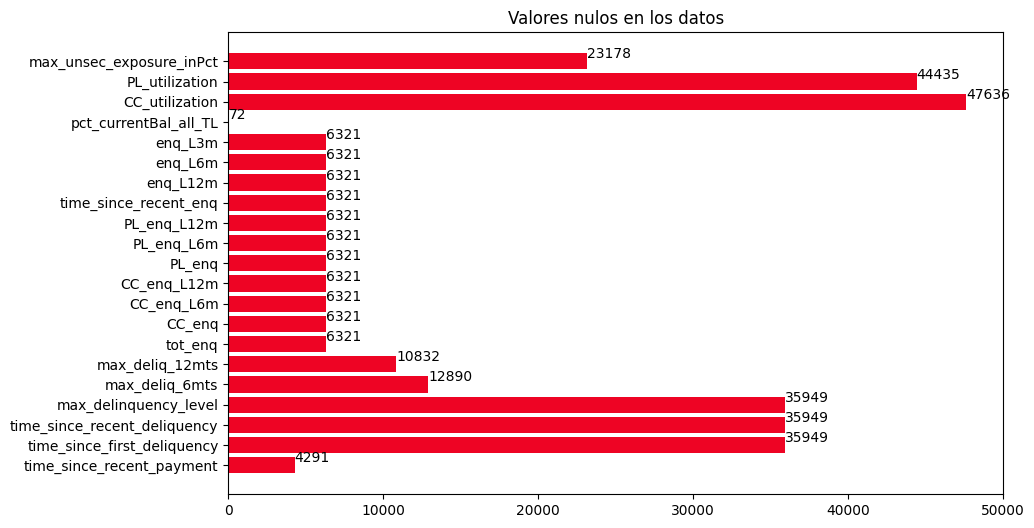

In [7]:
# Representamos mediante una gráfica de barras la cantidad de valores nulos por variable
plt.figure(figsize=(10, 6))
bars = plt.barh(y=q_nulos.index, width=q_nulos, color='#EE0424')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='bottom')
plt.title('Valores nulos en los datos')

plt.show()

**A. CC_utilization / PL_utilization:** Ambas variables tienen un elevado numero de valores faltantes, pero es debido a que solo registra a aquellas personas que tienen una tarjeta de crédito o un préstamo personal aunque no lo hayan utilizado. Por lo tanto, se puede salvar ambas variables ya que los valores valtantes simplemente tienen una utilización de 0. Para determianar si un cliente dispone de ese producto están las variables CC_FLag y PL_Flag

In [8]:
# Se crea una función donde se realiza la comprobación en ambas variables
def print_flags(column_utilization, column_flag):
    filtered_data = external.dropna(subset=[column_utilization])
    print(filtered_data[column_flag].unique())

print_flags('CC_utilization', 'CC_Flag')
print("="*100)
print_flags('PL_utilization', 'PL_Flag')


[ True]
[ True]


In [9]:
# Reemplazar los valores NaN por 0 en ambas columnas
external['CC_utilization'] = external['CC_utilization'].fillna(0)
external['PL_utilization'] = external['PL_utilization'].fillna(0)

**B. max_delinquency_level**: Midel el nivel máximo de morosidad. Tiene un 70% de valores nulos. A su vez, disponemos de una variable similar *max_recent_level_of_deliq*, la cual expresa con una puntuación de 1-900 el nivel de morosidad mayor más reciente. Se procede a realizar un test de correlación de pearson para conocer si es rempazable

In [10]:
# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_delinquency_level', 'max_recent_level_of_deliq', external)

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [11]:
# Se elimina la variable
external = external.drop('max_delinquency_level', axis=1)

**C. time_since_first_deliquency / time_since_recent_deliquency**: Nos encontramos con una situación similar a la primera. Los valores nulos podrían representar que nunca han incurrido en un delito de mora.

In [12]:
# Realizamos la comprobación en ambas variables
first_del = external[external['time_since_first_deliquency'].notna()]

print(first_del['num_times_delinquent'].max())

print("="*100)

recent_del = external[external['time_since_recent_deliquency'].notna()]

print(recent_del['num_times_delinquent'].max())

74
74


Comprobamos que hay ciertos clientes que si han incurrido en mora en reiteradas veces, por lo tanto no se dispone del dato pero este existe. Se procede a descartar las variables

In [13]:
# Se eliminan las variables
external = external.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'], axis=1)

**D. max_unsec_exposure_inPct**: Debido a que consta con más de un 45% de valores nulos, además de valores atípicos que están fuera del rango natural. Tampoco existe forma de comprobar si los productos de que tienen contratados los clientes tienen una exposición no Garantizada. Se toma la decisión de descartar la variable.

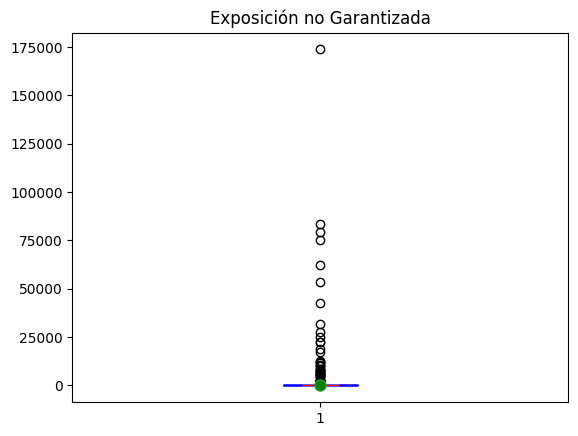

In [14]:
# Reprensentamos un boxplot para tener una visión de los valoes nulos
x = external['max_unsec_exposure_inPct'].dropna()

plt.boxplot(x, 
            notch=True, 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'),
            showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='green', markersize=8))
plt.title('Exposición no Garantizada')
plt.show()

In [15]:
# Se elimina la variable
external = external.drop(['max_unsec_exposure_inPct'], axis=1)

**E. max_deliq_6mts/max_deliq_12mts**: Representan dos variables con alrededor de un 20% de valores nulos. Las distribuciones entre sí, junto con la de *max_recent_level_of_deliq* son bastante similares. Por úlitmo, se comprueba la correlación entre ambas y debido a los resultados se decide eliminarlas

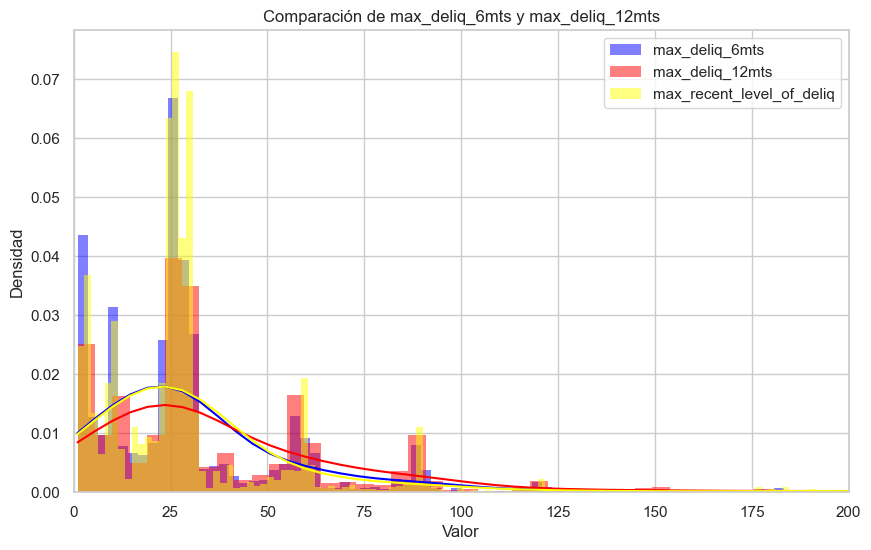

In [16]:
# Representamos un histograma para conocer las distribuciones
x = external[(external['max_deliq_6mts'] > 0)].dropna(subset=['max_deliq_6mts', 'max_deliq_12mts'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.xlim(right=200)

sns.histplot(x['max_deliq_6mts'], kde=True, color='blue', label='max_deliq_6mts', stat='density', linewidth=0)
sns.histplot(x['max_deliq_12mts'], kde=True, color='red', label='max_deliq_12mts', stat='density', linewidth=0)
sns.histplot(x['max_recent_level_of_deliq'], kde=True, color='yellow', label='max_recent_level_of_deliq', stat='density', linewidth=0)

plt.legend()
plt.title('Comparación de max_deliq_6mts y max_deliq_12mts')
plt.xlabel('Valor')
plt.ylabel('Densidad')

plt.show()

In [17]:
# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_deliq_6mts', 'max_deliq_12mts', external)

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [18]:
# Se eliminan las variables
external = external.drop(['max_deliq_6mts', 'max_deliq_12mts'], axis=1)

**F. tot_enq, CC_enq_L6m, CC_enq, CC_enq_L12m, PL_enq, enq_L12m, PL_enq_L6m, PL_enq_L12m, time_since_recent_enq, enq_L3m, enq_L6m, time_since_recent_payment, pct_currentBal_all_TL**: Todas estas vaiables representan características de cada cliente en referencia a las consultas sobre productos financieros. Sus valores están relacionados. Sustituimos todos los valores relacionados con los productos CC y PL por el valor 0 debido a que se llega a la conclusión de que son clientes que no han realizado ninguna consulta. Se sustituye por 1 la variable **tot_enq** debido a que mínimo han realizado una consulta a los productos *others*

In [19]:
# Observamos de nuevo la cantidad de valores nulos que tenemos por variable
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0].sort_values(ascending=False)

print(q_nulos)

tot_enq                      6321
CC_enq_L6m                   6321
CC_enq                       6321
CC_enq_L12m                  6321
PL_enq                       6321
enq_L12m                     6321
PL_enq_L6m                   6321
PL_enq_L12m                  6321
time_since_recent_enq        6321
enq_L3m                      6321
enq_L6m                      6321
time_since_recent_payment    4291
pct_currentBal_all_TL          72
dtype: int64


Confirmamos que todas las variables que representan algún aspecto relacionado con las **consultas(enq)** tienen la misma cantidad de valores nulos

In [20]:
# Creo un bucle para verificar que los valores no nulos de las variables enq tienen los mismos índices
contador = 0
while contador < 12:
    col1 = q_nulos.index[0]
    col2 = q_nulos.index[contador]
    col1_limpia = external.dropna(subset=[col1])
    col2_limpia = external.dropna(subset=[col2])
    
    ids_col1 = set(col1_limpia['PROSPECTID'])
    ids_col2 = set(col2_limpia['PROSPECTID'])
    
    if ids_col1 == ids_col2:
        print(f"Las columnas {col1} y {col2} tienen los mismos IDs después de eliminar los valores nulos.")
    else:
        print(f"Las columnas {col1} y {col2} tienen diferentes IDs después de eliminar los valores nulos.")
    print("="*100)
    contador += 1

Las columnas tot_enq y tot_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y time_since_recent_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L3m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L6m tienen los mismos IDs 

Confirmamos que todos los valores nulos de las variables **enq** pertenecen a las mismas observaciones

In [21]:
# Describimos las variables numéricas
external[external['tot_enq'].isnull()].describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
count,6321.000000,4944.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.0,6321.000000,6321.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6291.000000,6321.000000,6321.000000,6321.0,6321.0,6321.0,6321.0,6321.000000
mean,25696.895744,510.129450,0.876285,11.093972,0.065338,0.164373,0.099035,0.575542,0.411644,12.086537,1.880873,4.251859,0.072457,0.005062,0.013764,0.042715,0.001266,0.005062,0.011232,0.0,0.000633,9.728524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.434267,23499.518431,115.568423,0.481702,0.192138,0.584463,0.002426,0.016909,0.0,0.0,0.0,0.0,686.736751
std,14662.276736,696.802393,2.922827,53.197138,0.426573,0.842710,0.555753,2.342243,1.965723,22.997495,3.686902,8.126716,0.925621,0.152945,0.343060,0.797788,0.071146,0.190701,0.296659,0.0,0.035573,46.954189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.011868,14917.611391,78.851078,0.428562,0.371074,4.295656,0.044055,0.116176,0.0,0.0,0.0,0.0,15.351772
min,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,589.000000
25%,13233.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,15000.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,678.000000
50%,25369.000000,221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,20000.000000,101.000000,0.444000,0.000000,0.627000,0.000000,0.000000,0.0,0.0,0.0,0.0,685.000000
75%,38309.000000,655.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,28000.000000,146.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,694.000000
max,51329.000000,5690.000000,39.000000,900.000000,6.000000,11.000000,11.000000,34.000000,32.000000,303.000000,60.000000,107.000000,42.000000,8.000000,20.000000,32.000000,4.000000,10.000000,15.000000,0.0,2.000000,900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,520000.000000,936.000000,1.000000,1.000000,338.347000,1.002000,1.137000,0.0,0.0,0.0,0.0,811.000000


In [22]:
# Describimos las variables objeto
external[external['tot_enq'].isnull()].describe(include='object')

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
count,6321,6321,6321,6321,6321,6321
unique,2,7,2,1,1,4
top,Married,12TH,M,others,others,P2
freq,4857,1897,5319,6321,6321,4967


Observamos que las variables que representan el porcentaje de consultas tienen un **valor de 0**. Y que los últimas consultas que realizó fueron a los productos **others**.

In [23]:
# Bucle para sustituir los valores nulos de las variables enq por 0
for col in [
    "CC_enq_L6m", "CC_enq", "CC_enq_L12m", "PL_enq", 
    "enq_L12m", "PL_enq_L6m", "PL_enq_L12m", "time_since_recent_enq", 
    "enq_L3m", "enq_L6m"
]:
    external[col] = external[col].fillna(0)

# Bucle para sustituir los valores de 'tot_enq' por 1
external["tot_enq"] = external["tot_enq"].fillna(1)

**G. time_since_recent_payment:** Se revisa que algunos tienen pagos registrados en los últimos 6 o, 12 o más meses. Se decide hacer una sustitución por los valores nulos en función de la franja de pago que tengan registrados.

In [24]:
# Revisamos las características estadísticasd de las variables
external[external['time_since_recent_payment'].isnull()].describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
count,4291.000000,0.0,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.0,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.0,4291.0,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.00000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4283.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,25837.757166,NaN,0.602890,7.144955,0.051503,0.147751,0.096248,0.389420,0.271498,4.798648,0.980890,2.069914,0.019110,0.0,0.000699,0.022838,0.000932,0.002330,0.001864,0.0,0.0,6.379632,2.304824,0.137730,0.074342,0.097646,0.38639,0.246330,0.306921,129.088091,1.545094,1.287113,0.955721,32.634817,24669.508506,107.257283,0.735316,0.374533,0.646535,0.014469,0.041053,0.127930,0.044367,0.121656,0.042659,676.117455
std,14828.647401,NaN,2.456774,42.907087,0.355974,0.787775,0.559147,1.966045,1.611490,12.327864,2.280577,5.015478,0.390575,0.0,0.026435,0.612945,0.061063,0.152658,0.077828,0.0,0.0,38.157301,2.621913,0.651268,0.443362,0.522698,1.11290,0.863752,0.993544,328.150762,2.489513,2.177672,1.750364,8.931737,17072.921130,76.288717,0.412227,0.473799,0.561894,0.120597,0.183727,0.328618,0.202179,0.317305,0.196956,16.006415
min,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000
25%,13010.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,16000.000000,59.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,25562.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,31.000000,22000.000000,87.000000,1.000000,0.000000,0.778000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,677.000000
75%,38796.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,78.500000,2.000000,2.000000,1.000000,38.000000,30000.000000,130.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000
max,51329.000000,NaN,32.000000,900.000000,5.000000,11.000000,6.000000,31.000000,31.000000,188.000000,28.000000,75.000000,14.000000,0.0,1.000000,25.000000,4.000000,10.000000,4.000000,0.0,0.0,900.000000,51.000000,14.000000,14.000000,14.000000,17.00000,16.000000,17.000000,3398.000000,50.000000,45.000000,37.000000,77.00

In [25]:
# Creamos un script para sustituir los valores nulos
_ = external[external['time_since_recent_payment'].isnull()]

media_pago6 = external[external['time_since_recent_payment'] <= 180]['time_since_recent_payment'].mean()
mediana_pago12 = external[external['time_since_recent_payment'] > 180]['time_since_recent_payment'].median()

q6 = _['num_std_6mts'] + _['num_sub_6mts']
q12 = _['num_std_12mts'] + _['num_sub_12mts']

# En el caso de que haya realizado un pago en los últimos 6 meses le asignamos la media
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q6 > 0), 
    'time_since_recent_payment'
] = round(media_pago6, 0)

# En el caso de que haya realizado un pago en los últimos 12 meses o más le asignamos la (mediana debido a los outliers)
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q12 > 0), 
    'time_since_recent_payment'
] = round(mediana_pago12, 0)

# Para el resto si no se han registrado pagos se le asigna 0
external.loc[
    external['time_since_recent_payment'].isnull(), 
    'time_since_recent_payment'
] = 0

**H. pct_currentBal_all_TL:** a esta variable le asignaremos la media de de sus valores evitando los valores atípicos que los manejaremos más adelante

In [26]:
# Creamos la constante  y la asignamos a los valores nulos
media_ins = external.loc[external['pct_currentBal_all_TL'] <= 1, 'pct_currentBal_all_TL'].mean()
external['pct_currentBal_all_TL'] = external['pct_currentBal_all_TL'].fillna(round(media_ins, 2))


In [27]:
external.isnull().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

### 2.3. Outliers

In [28]:
# Cambiamos todos aquellos valores float sin decimales a tipo int
float_columns = external.select_dtypes(include=['float']).columns
columns_to_convert = [col for col in float_columns if (external[col] % 1 == 0).all()]
external[columns_to_convert] = external[columns_to_convert].astype(int)
print(f"Columnas convertidas a int: {columns_to_convert}")

Columnas convertidas a int: ['time_since_recent_payment', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m']


In [29]:
# Creamos una variable con las variables numéricas
numeric_features = []

for col in external.columns:
    if external[col].dtype != 'object' and external[col].dtype != 'bool' and col not in ['PROSPECTID']:
        numeric_features.append(col)

len(numeric_features)

45

In [30]:
# Creamos un diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers
for column in numeric_features:
    Q1 = external[column].quantile(0.25)
    Q3 = external[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = external[(external[column] < lower_bound) | (external[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostramos el recuento
print("Recuento de outliers por feature:")
for column, count in outlier_count.items():
    if count != 0:
        print(f"{column}: {count}")
    else:
        pass

Recuento de outliers por feature:
time_since_recent_payment: 8788
num_times_delinquent: 8457
max_recent_level_of_deliq: 8495
num_deliq_6mts: 4782
num_deliq_12mts: 8428
num_deliq_6_12mts: 6149
num_times_30p_dpd: 7991
num_times_60p_dpd: 4889
num_std: 7381
num_std_6mts: 11316
num_std_12mts: 9443
num_sub: 654
num_sub_6mts: 51
num_sub_12mts: 158
num_dbt: 170
num_dbt_6mts: 16
num_dbt_12mts: 40
num_lss: 102
num_lss_6mts: 12
num_lss_12mts: 25
recent_level_of_deliq: 10321
tot_enq: 3358
CC_enq: 7835
CC_enq_L6m: 3935
CC_enq_L12m: 5452
PL_enq: 6242
PL_enq_L6m: 11100
PL_enq_L12m: 3830
time_since_recent_enq: 5600
enq_L12m: 4097
enq_L6m: 3809
enq_L3m: 6858
AGE: 582
NETMONTHLYINCOME: 3106
Time_With_Curr_Empr: 4154
pct_currentBal_all_TL: 49
CC_utilization: 3128
PL_utilization: 6723
pct_PL_enq_L6m_of_L12m: 11100
pct_CC_enq_L6m_of_L12m: 3935
pct_PL_enq_L6m_of_ever: 11100
pct_CC_enq_L6m_of_ever: 3935
Credit_Score: 2106


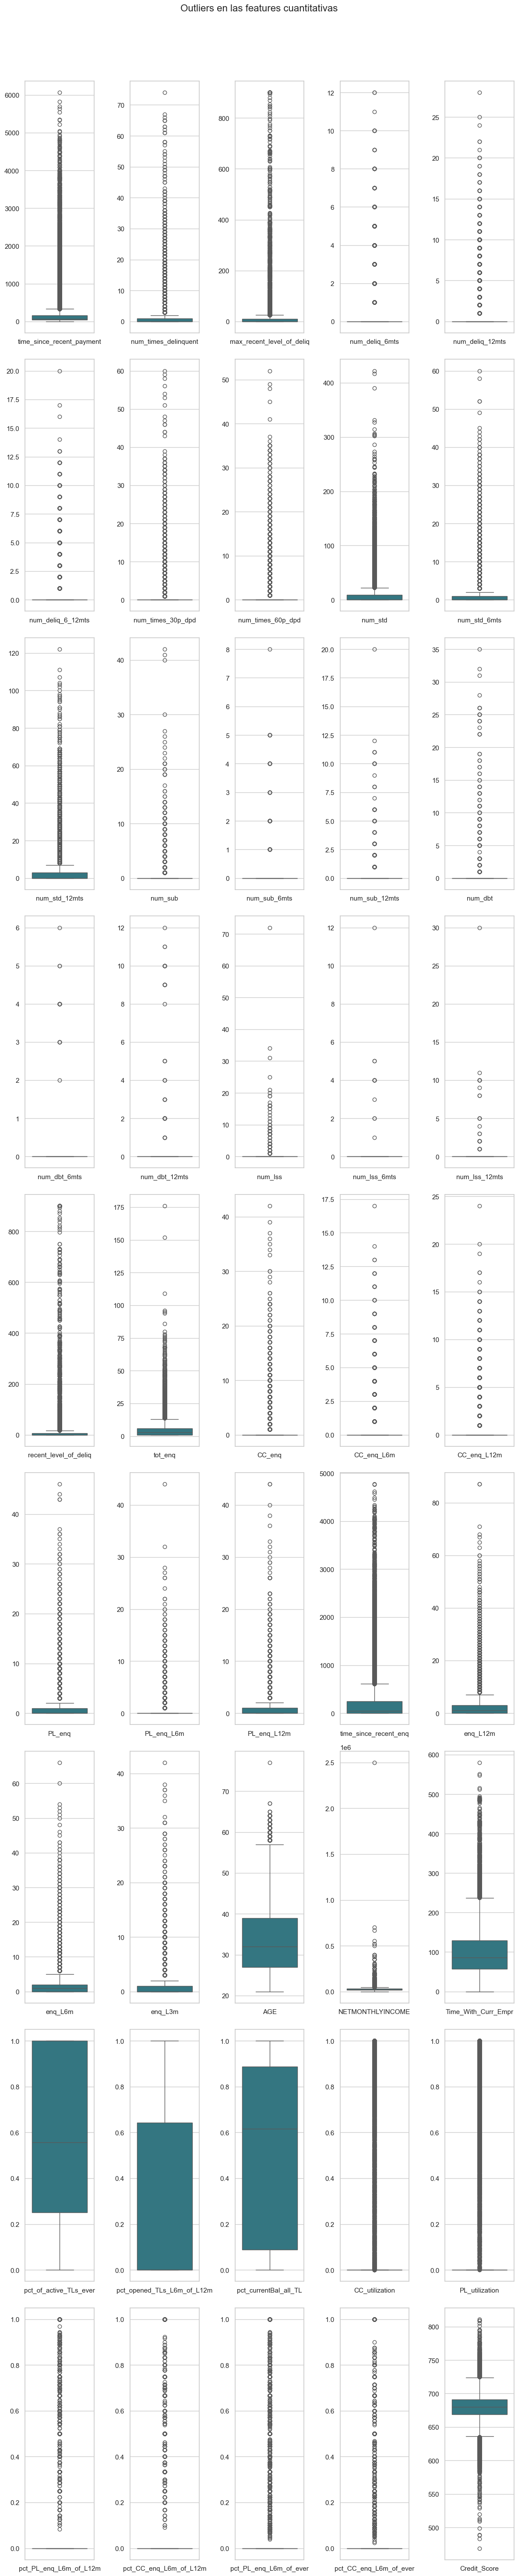

In [58]:
# Estilo
sns.set_palette("Set2")


color_viridis = sns.color_palette("viridis")[2]
plt.figure(figsize=(4.0 * 3, 4.0 * 15))


for i, column in enumerate(numeric_features):
    plt.subplot(9, 5, i + 1)
    sns.boxplot(data=external[[column]], color = color_viridis) 

# Show
plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Las variables **pct_currentBal_all_TL, CC_utilization y PL_utilization** deberían estar en un rango de 0 a 1 debido a que son porcentajes. Dicho esto, se procede a asignar el valor a la alta para tales valores atípicos.

In [32]:
# Crear una máscara para las filas donde la condición se cumple y asignarle el valor superior
pct_cols = ['pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization']
for i in pct_cols:
    mask = external[i] > 1
    external.loc[mask, i] = 1

La variable **Time_With_Curr_Empr** está representada en meses. Por lo que es imposible que haya valores tan altos para edades tan bajas, lo que me hace llegar a la conclusión que esos valores están en días en vez de en meses. Realizaremos una operación con vectores y su correspondiente mascara para realizar un proceso de filtrado y reasignación de valores. Todos aquellos que tengan una cantidad de tiempo en su actual empleo superior a su tiempo activo se le imputará el valor que tienen formateado en meses.

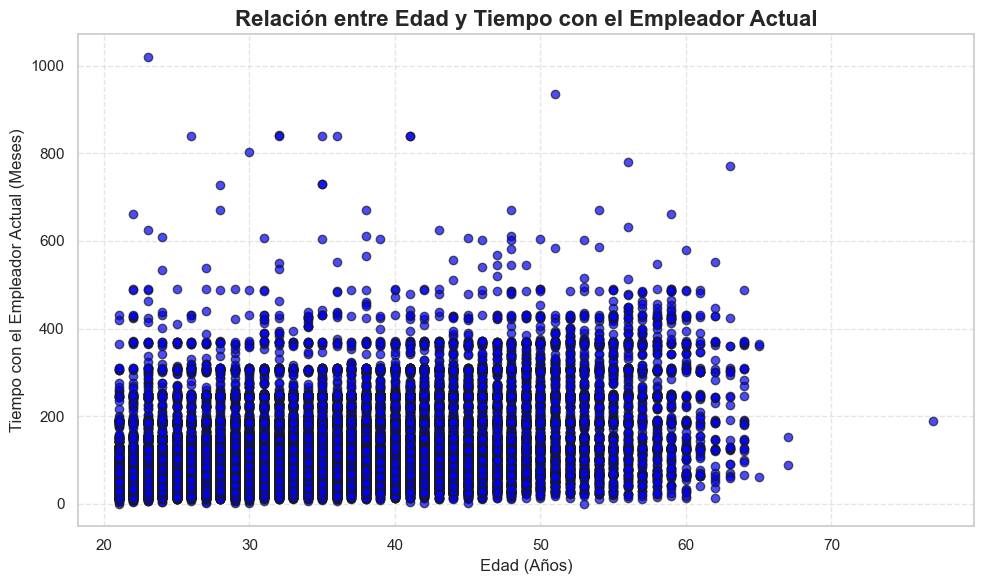

In [33]:
# Representamos la relación entre la edad y el tiempo que llevan en el actual empleo
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
# Para calcular el tiempo activo se le resta 10 a la edad (En la India es típico la explotación infantil)
TIME_ACTIVE = external['AGE'] - 10
CURR_EMPL_YEAR = external['Time_With_Curr_Empr'] / 12

# Crear una máscara para las filas donde la condición se cumple
mask = CURR_EMPL_YEAR > TIME_ACTIVE

# Actualizar las filas específicas de forma vectorizada
external.loc[mask, 'Time_With_Curr_Empr'] = external.loc[mask, 'Time_With_Curr_Empr'] / 12

C:\Users\Ismael Laso\AppData\Local\Temp\ipykernel_26316\3142089663.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[22.91666667 25.5        12.5        ... 15.91666667 30.83333333
 15.58333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  external.loc[mask, 'Time_With_Curr_Empr'] = external.loc[mask, 'Time_With_Curr_Empr'] / 12


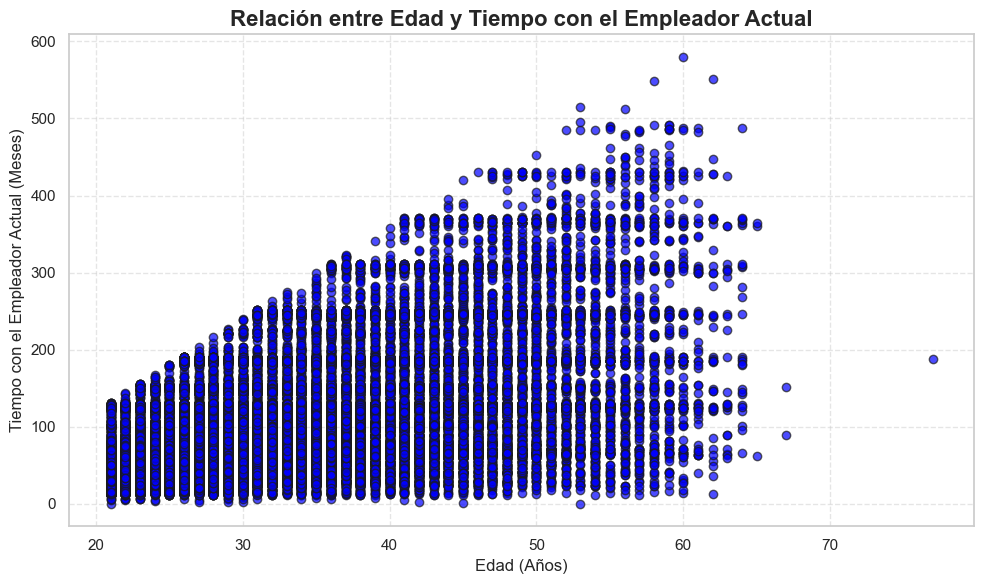

In [35]:
# Volvemos a representar para ver el cambio lógico de la representación
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# # Comprobamos la normalidad mediante la representación de los QQ-plots y una prueba de Shapiro-Wilk
# shapiro_test = comprueba_normalidad(external[numeric_features])
# shapiro_test

Para transformar las distribuciones de las variables, tomaremos la siguiente estrategia. Aquellas variables que tengan una distribución discreta serán escaladas utilizando un escalado robusto, debido a su menor sensibilidad a los valores atípicos y su capacidad para mantener la integridad de las relaciones entre los datos. Por otro lado, las variables con distribuciones continuas serán transformadas mediante el método Box-Cox, ya que este método permite ajustar la forma de la distribución a una más normal, mejorando así la precisión de los modelos estadísticos y la eficacia en el análisis predictivo.

In [37]:
print(external.dtypes.value_counts())

int64      36
float64    10
object      6
bool        4
Name: count, dtype: int64


In [49]:
# Iterar sobre las columnas del df prueba
count1 = 0
count2 = 0
count3 = 0

prueba = external.copy()

for i in prueba[numeric_features]:
    if skew(prueba[i]) > 1.5:
        prueba[i] = np.log(prueba[i])
        count1 += 1
    
    elif np.issubdtype(prueba[i].dtype, np.integer):  # Comprobar si la columna es de tipo entero
        r_scaler = RobustScaler()  # Crear el objeto RobustScaler
        col = prueba.loc[:, i].values.reshape(-1, 1)  # Reshape para hacer compatible con fit_transform
        prueba[i] = r_scaler.fit_transform(col)  # Aplicar el escalado robusto
        count2 += 1
        
    elif np.issubdtype(prueba[i].dtype, np.floating):  # Comprobar si la columna es de tipo float
        bc = PowerTransformer(method='yeo-johnson')  # Crear el objeto PowerTransformer con Yeo-Jonhson
        col = prueba.loc[:, i].values.reshape(-1, 1)  # Reshape para hacer compatible con fit_transform
        prueba[i] = bc.fit_transform(col)  # Aplicar la transformación Yeo-Jonhson
        count3 += 1
        
    else:
        pass
    
print(count1)
print(count2)
print(count3)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


39
2
4


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [54]:
from scipy.stats import skew, boxcox
from sklearn.preprocessing import RobustScaler
import numpy as np

# Inicializar listas para las variables transformadas
log_transformed = []  # Variables transformadas con logaritmo
robust_scaled = []    # Variables transformadas con RobustScaler
boxcox_transformed = []  # Variables transformadas con Box-Cox

prueba = external.copy()

for i in prueba[numeric_features]:
    if skew(prueba[i]) > 1:  # Si la asimetría es mayor que 1 (asimetría positiva)
        # Aplicar la transformación logarítmica: log(x + 1)
        prueba[i] = np.log(prueba[i] + 1.0)
        log_transformed.append(i)  # Agregar la columna transformada a la lista de logaritmo
    
    elif np.issubdtype(prueba[i].dtype, np.integer):  # Si la columna es de tipo entero
        r_scaler = RobustScaler()  # Crear el objeto RobustScaler
        col = prueba.loc[:, i].values.reshape(-1, 1)  # Reshape para hacer compatible con fit_transform
        prueba[i] = r_scaler.fit_transform(col)  # Aplicar el escalado robusto
        robust_scaled.append(i)  # Agregar la columna transformada a la lista de RobustScaler
        
    elif np.issubdtype(prueba[i].dtype, np.floating):  # Si la columna es de tipo float
        # Aplicar la transformación Box-Cox
        col = prueba.loc[:, i].values
        # Box-Cox requiere que los valores sean positivos, así que agregamos 1 si es necesario
        col_transformed, _ = boxcox(col + 1)  # Agregar 1 para evitar valores cero o negativos
        prueba[i] = col_transformed
        boxcox_transformed.append(i)  # Agregar la columna transformada a la lista de Box-Cox
        
    else:
        pass

# Imprimir las listas de las variables transformadas por cada técnica
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con RobustScaler: {robust_scaled}')
print(f'Variables transformadas con Box-Cox: {boxcox_transformed}')


Variables transformadas con logaritmo: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_utilization', 'PL_utilization', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever']
Variables transformadas con RobustScaler: ['AGE', 'Credit_Score']
Variables transformadas con Box-Cox: ['pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL']


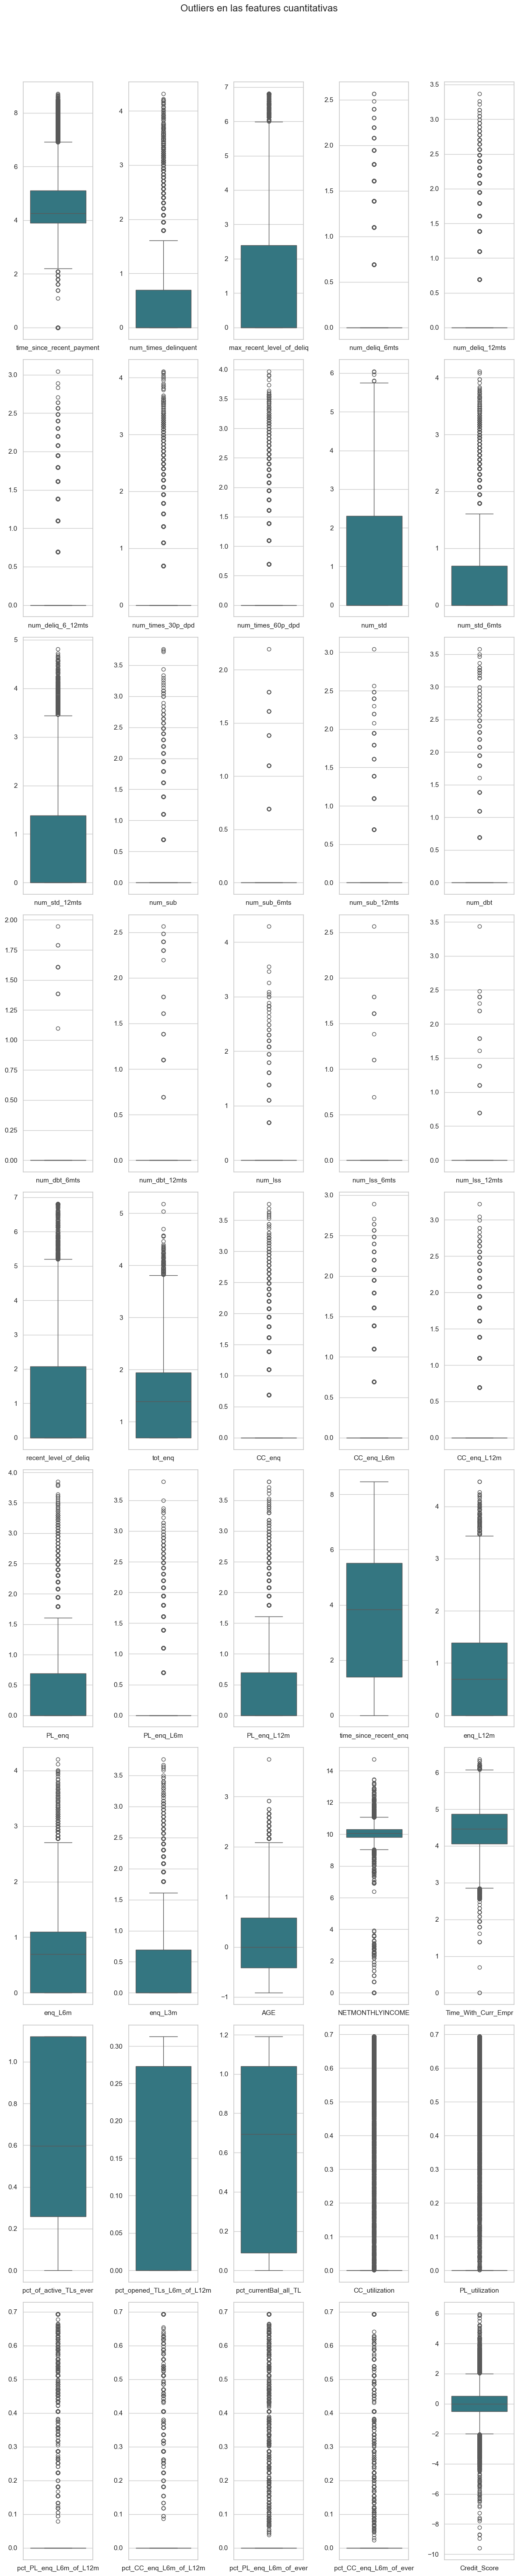

In [57]:
# Estilo
sns.set_palette("Set2")


color_viridis = sns.color_palette("viridis")[2]
plt.figure(figsize=(4.0 * 3, 4.0 * 15))


for i, column in enumerate(numeric_features):
    plt.subplot(9, 5, i + 1)
    sns.boxplot(data=prueba[[column]], color = color_viridis) 

# Show
plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [55]:
prueba.describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.407836,0.452818,0.970974,0.094354,0.197578,0.135146,0.223726,0.133384,1.030354,0.461925,0.668030,0.019247,0.001141,0.003721,0.005967,0.000488,0.001290,0.003571,0.000360,0.000797,0.920104,1.451220,0.169449,0.072777,0.108375,0.419443,0.215778,0.306017,3.553928,0.928383,0.692011,0.498881,0.146544,10.039755,4.443731,0.636095,0.111605,0.617599,0.031383,0.073658,0.134920,0.046441,0.122659,0.040855,-0.006399
std,14819.571046,1.559358,0.805285,1.585258,0.316656,0.496093,0.398864,0.593220,0.467083,1.467929,0.809675,1.093903,0.186988,0.038482,0.073789,0.115279,0.027848,0.049339,0.087902,0.024479,0.039573,1.512722,0.713628,0.453331,0.273397,0.347812,0.633922,0.457069,0.537915,2.314773,0.804317,0.732247,0.621583,0.734697,0.677284,0.676002,0.428880,0.138483,0.448481,0.133525,0.196494,0.263687,0.165949,0.247022,0.151548,0.931944
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.590909
25%,12834.750000,3.891820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,-0.416667,9.798183,4.060443,0.258585,0.000000,0.090721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000
50%,25668.500000,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.828641,0.693147,0.693147,0.000000,0.000000,10.043293,4.465908,0.596050,0.000000,0.693199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38502.250000,5.099866,0.693147,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,0.693147,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,1.945910,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,5.513429,1.386294,1.098612,0.693147,0.583333,10.308986,4.867534,1.120489,0.272995,1.040321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
max,51336.000000,8.710455,4.317488,6.803505,2.564949,3.367296,3.044522,4.110874,3.970292,6.047372,4.110874,4.812184,3.761200,2.197225,3.044522,3.583519,1.945910,2.5

In [42]:
prueba_log = external[numeric_features].copy()
for col in prueba_log.columns:
    epsilon = 1
    prueba_log[col] = np.log(prueba_log[col] + epsilon)

In [88]:
prueba_log.describe()

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,4.407836,0.452818,0.970974,0.094354,0.197578,0.135146,0.223726,0.133384,1.030354,0.461925,0.668030,0.019247,0.001141,0.003721,0.005967,0.000488,0.001290,0.003571,0.000360,0.000797,0.920104,1.451220,0.169449,0.072777,0.108375,0.419443,0.215778,0.306017,3.553928,0.928383,0.692011,0.498881,3.517991,10.039755,4.443731,0.424229,0.220927,0.394644,0.031383,0.073658,0.134920,0.046441,0.122659,0.040855,6.522900
std,1.559358,0.805285,1.585258,0.316656,0.496093,0.398864,0.593220,0.467083,1.467929,0.809675,1.093903,0.186988,0.038482,0.073789,0.115279,0.027848,0.049339,0.087902,0.024479,0.039573,1.512722,0.713628,0.453331,0.273397,0.347812,0.633922,0.457069,0.537915,2.314773,0.804317,0.732247,0.621583,0.244210,0.677284,0.676002,0.257285,0.287416,0.265127,0.133525,0.196494,0.263687,0.165949,0.247022,0.151548,0.030252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.091042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.152733
25%,3.891820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,3.332205,9.798183,4.060443,0.223144,0.000000,0.085260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.507278
50%,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.828641,0.693147,0.693147,0.000000,3.496508,10.043293,4.465908,0.442118,0.000000,0.480573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.523562
75%,5.099866,0.693147,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,0.693147,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,1.945910,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,5.513429,1.386294,1.098612,0.693147,3.688879,10.308986,4.867534,0.693147,0.496524,0.635518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.539586
max,8.710455,4.317488,6.803505,2.564949,3.367296,3.044522,4.110874,3.970292,6.047372,4.110874,4.812184,3.761200,2.197225,3.044522,3.583519,1.945910,2.564949,4.290459,2.564949,3.433987,6.803505,5.176150,3.761200,2.890372,3.218876,3.850148,3.806662,3.806662,8.469892,4.

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51336.
  res = hypotest_fun_out(*samples, **kwds)


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

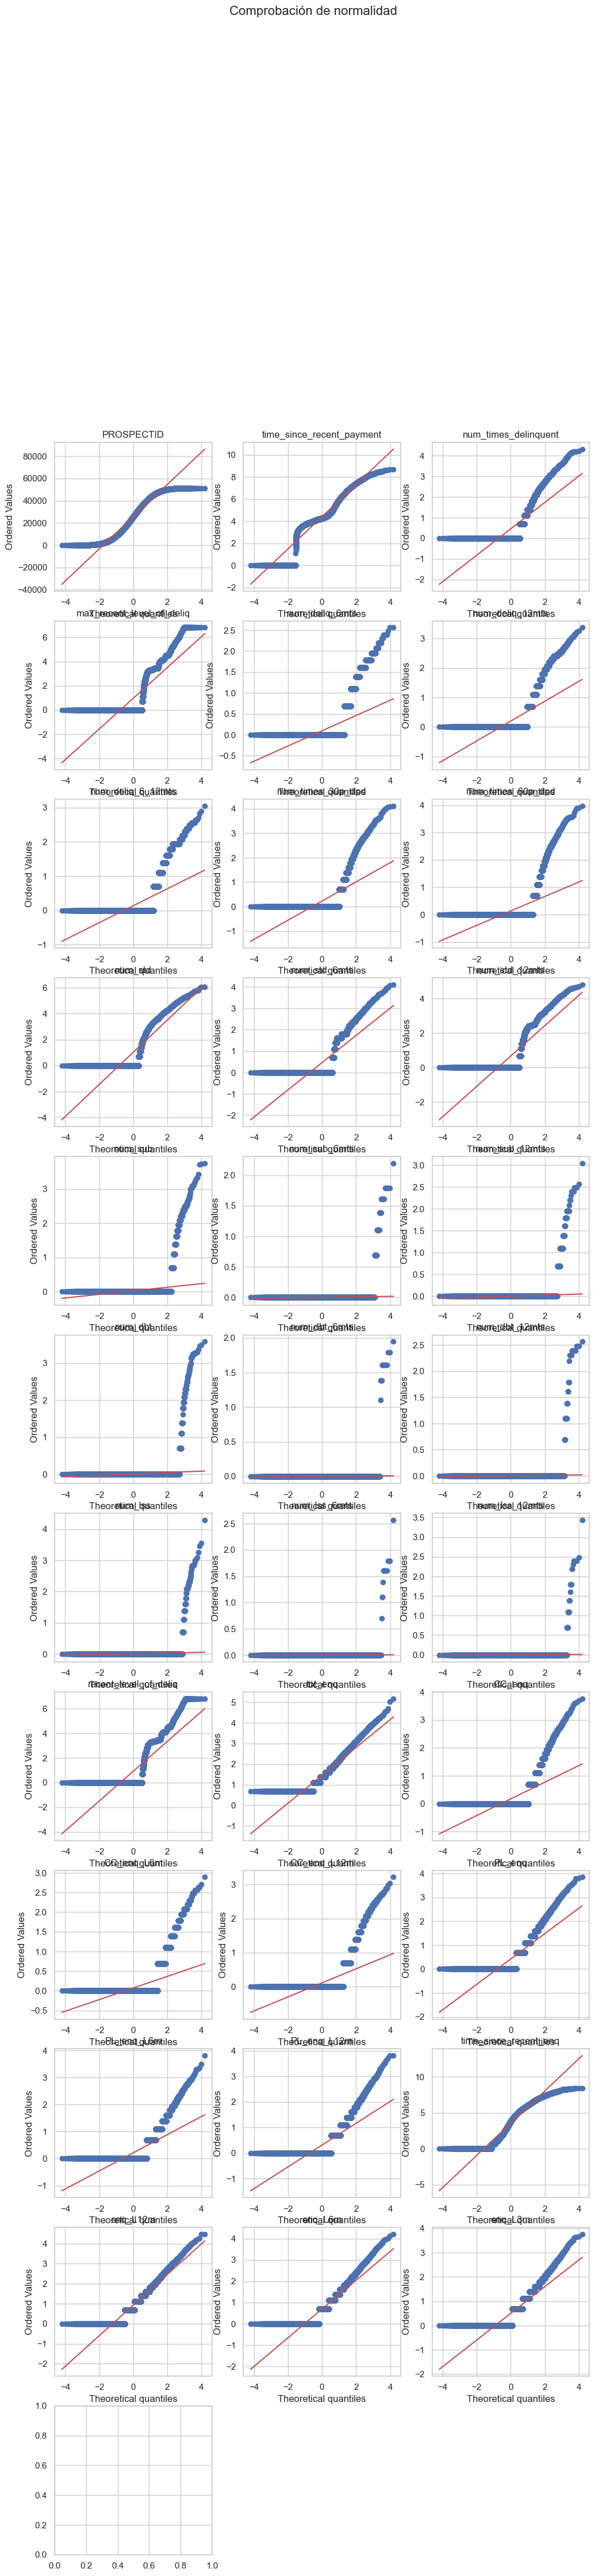

In [59]:
shapiro_test = comprueba_normalidad(prueba)
shapiro_test

In [ ]:
sns.set_palette("Set2")


color_viridis = sns.color_palette("viridis")[2]
plt.figure(figsize=(4.0 * 3, 4.0 * 15))


for i, column in enumerate(prueba_log):
    plt.subplot(9, 5, i + 1)
    sns.boxplot(data=prueba_log[[column]], color = color_viridis) 

# Show
plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [94]:
prueba_rb = external[numeric_features].copy()
r_scaler = RobustScaler()
for col in prueba_rb.columns:
    prueba_rb[col] = r_scaler.fit_transform(prueba_rb[[col]]) 

In [36]:
external.describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,5.133600e+04,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,230.929523,1.573749,13.521953,0.184977,0.480053,0.295076,0.728884,0.426971,9.204671,1.484027,3.319444,0.062646,0.002435,0.009292,0.025947,0.001208,0.004130,0.015097,0.000974,0.002844,11.266090,4.762681,0.409732,0.139337,0.228728,0.995403,0.444328,0.664368,228.031498,2.640350,1.749610,1.088827,33.758532,2.642419e+04,104.178507,0.577542,0.302955,0.534387,0.043121,0.101004,0.190414,0.065182,0.170492,0.056302,679.859222
std,14819.571046,452.574324,4.165012,53.336976,0.710240,1.522210,1.027471,2.762120,2.101404,21.308881,3.364581,7.518414,0.801218,0.091383,0.233403,0.635611,0.070331,0.179885,0.529730,0.075413,0.185349,46.100309,5.954877,1.568486,0.632430,0.939364,2.214076,1.278429,1.675665,441.019785,4.072401,2.995928,1.974588,8.816364,2.002711e+04,69.457458,0.379867,0.406049,0.378258,0.186490,0.272598,0.376218,0.235706,0.350209,0.213506,20.502764
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,469.000000
25%,12834.750000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,27.000000,1.800000e+04,57.000000,0.250000,0.000000,0.089000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.000000,1.000000,0.000000,32.000000,2.300000e+04,86.000000,0.556000,0.000000,0.617000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,680.000000
75%,38502.250000,163.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,247.000000,3.000000,2.000000,1.000000,39.000000,3.000000e+04,129.000000,1.000000,0.643000,0.888000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,691.000000
max,51336.000000,6065.000000,74.000000,900.000000,12.000000,28.000000,20.000000,60.000000,52.000000,422.

In [ ]:
prueba_rb.describe()

In [95]:
prueba_bc = external[numeric_features].copy()

In [ ]:
    elif np.issubdtype(prueba_bc[i].dtype, np.integer):  # Comprobar si la columna es de tipo entero
        r_scaler = RobustScaler()  # Crear el objeto RobustScaler
        col = prueba_bc.loc[:, i].values.reshape(-1, 1)  # Reshape para hacer compatible con fit_transform
        prueba_bc[i] = r_scaler.fit_transform(col)  # Aplicar el escalado robusto
        count2 += 1
        
    elif np.issubdtype(prueba_bc[i].dtype, np.floating):  # Comprobar si la columna es de tipo float
        bc = PowerTransformer(method='yeo-johnson')  # Crear el objeto PowerTransformer con Yeo-Jonhson
        col = prueba_bc.loc[:, i].values.reshape(-1, 1)  # Reshape para hacer compatible con fit_transform
        prueba_bc[i] = bc.fit_transform(col)  # Aplicar la transformación Yeo-Jonhson
        count3 += 1
        
    else:
        pass
    
print(count1)
print(count2)
print(count3)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51336.
  res = hypotest_fun_out(*samples, **kwds)


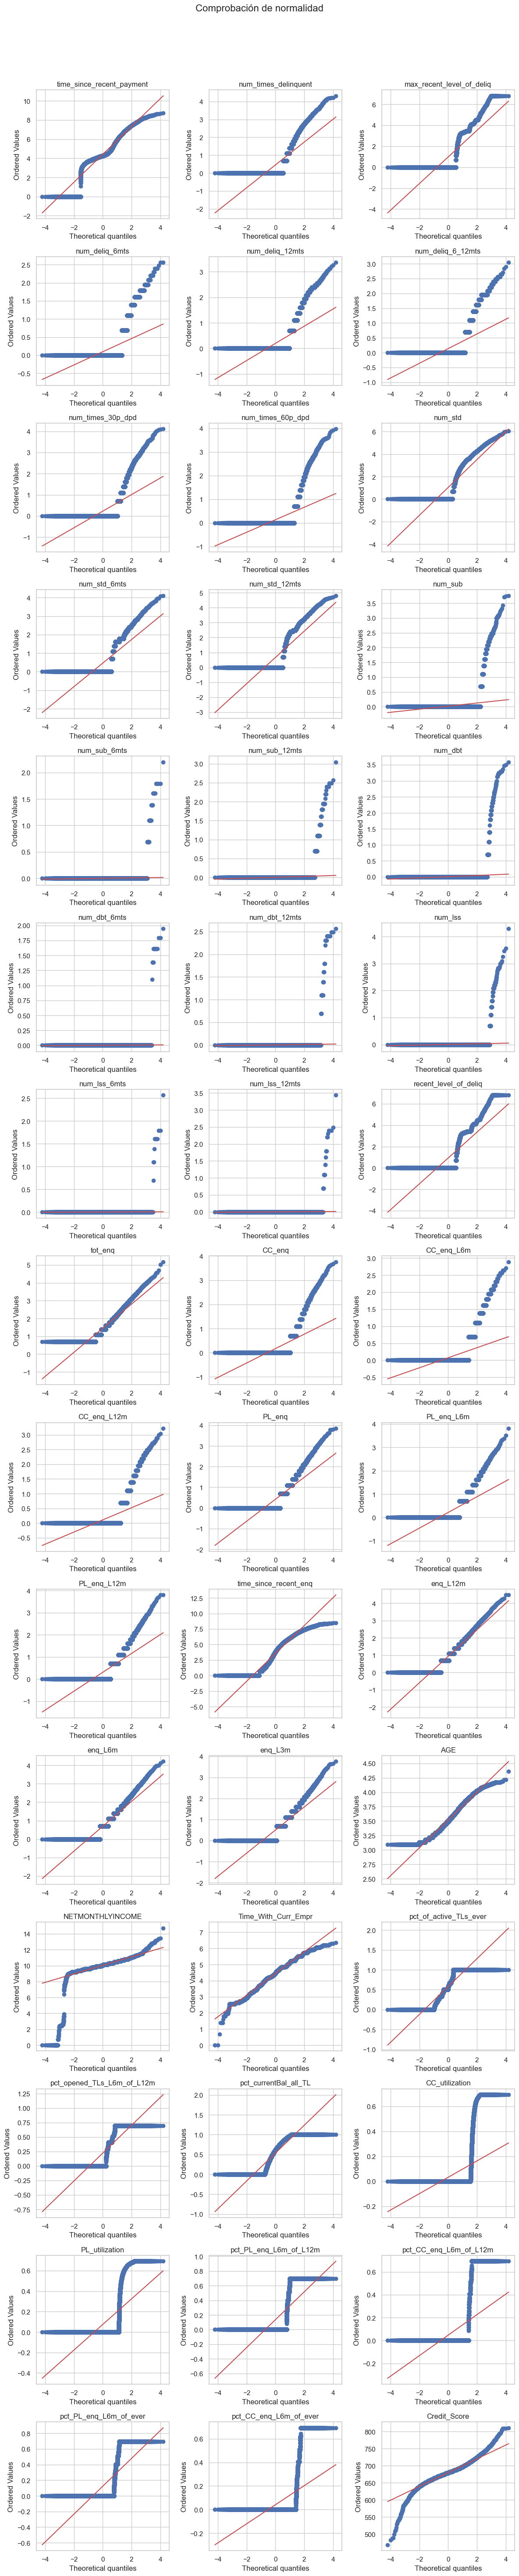

In [101]:
shapiro_test = comprueba_normalidad(external[numeric_features])
shapiro_test

ESCALADO ROBUSTO


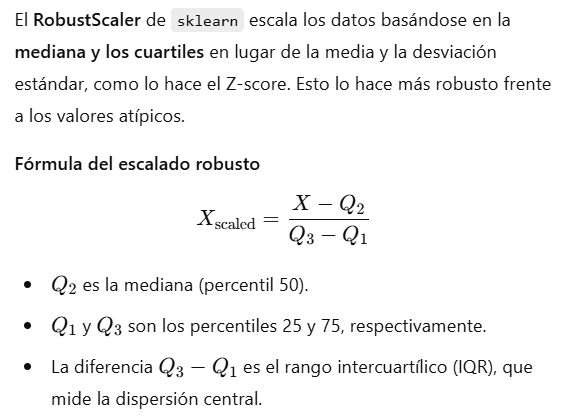

# A PARTIR DE AQUÍ NI CASO

## 3. Análisis Univariante (Test estadísticos)

## 4. Análisis Bivariante (Correlaciones)

### 5. Cardinalidad y estandarización(nomralización)